## **EX NO:**
##   **DATE :**
# <center>**Time series analysis**</center>


## **AIM:**

###To implement and evaluate time series forecasting models like Linear Regression, AR, MA, and AutoReg for temperature prediction. The goal is to compare their accuracy using MAE, MSE, RMSE, and R² metrics, identify the most effective model for time-dependent data, and understand the impact of trends and seasonality.

##**Import header files**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

##**Read the dataset**

In [2]:
data = pd.read_csv('temperature.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [4]:
# Load dataset
data = pd.read_csv('temperature.csv', parse_dates=['Date'],
index_col='Date')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [6]:
data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


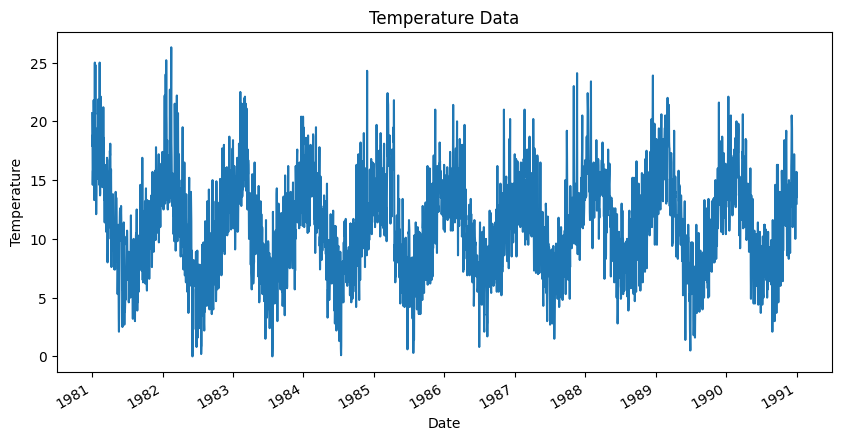

In [7]:
data['Temp'].plot(title='Temperature Data', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

# **Repeating Pattern = Seasonality**

-The temperature rises and falls in a wave-like pattern that appears consistently over time.

-This pattern repeats roughly every 365 days:

Higher values in some months summer,

Lower values in others likely winter.

# **No Long-Term Increase or Decrease = No Strong Trend**

Over the 10-year period (1981 to 1991), the average temperature level stays fairly stable.

There’s no clear upward or downward slope.

 Conclusion: There's no significant trend in the data — it's mostly flat over time.

# **Time series decomposition means breaking your data into 3 parts:**

Trend – long-term upward or downward movement

Seasonality – repeating patterns at fixed intervals (e.g yearly, monthly)

Residual (Noise) – what's left after removing trend and seasonality

In [8]:
# Decompose using additive model (safe for 0 or negative values)
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Temp'], model='additive', period=30)

## **additive because  temperature values may contain zeros or negative values, and multiplicative models need strictly positive data**

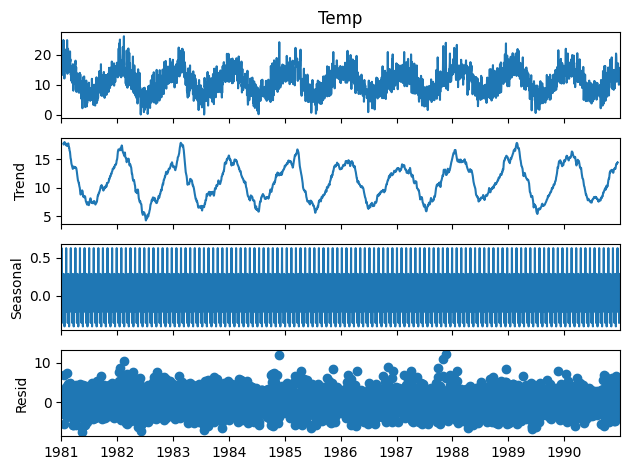

In [9]:
result.plot()
plt.show()

In [10]:
# Compute moving averages
data['MA_7'] = data['Temp'].rolling(window=7).mean()
data['MA_30'] = data['Temp'].rolling(window=30).mean()
data['MA_90'] = data['Temp'].rolling(window=90).mean()



1.    This creates a 7-day moving average:

For each day, it calculates the average temperature of that day and the previous 6 days.
2.   This is a 30-day moving average:

Averages each day with the past 29 days.

Useful to observe monthly trends in temperature (since ~30 days ≈ 1 month).
3.
This is a 90-day moving average:

Looks at the last 3 months (~1 season).

Best for identifying longer-term patterns or changes, like seasonal effects.





###USED FOR SMOOTHING

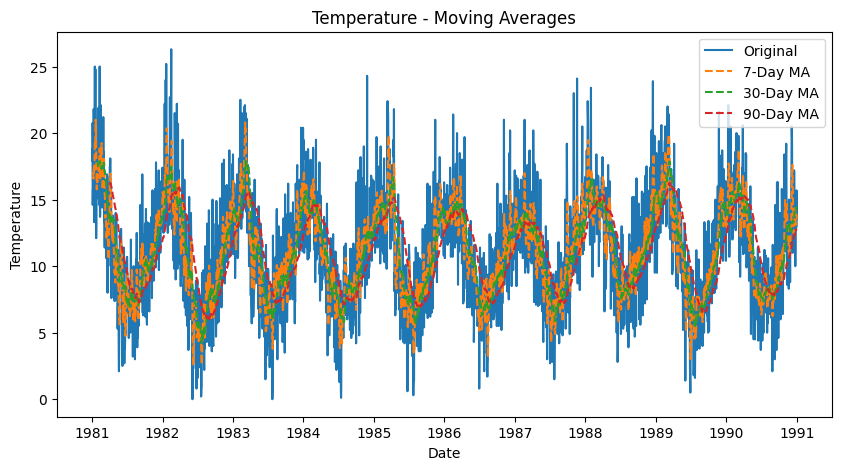

In [11]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['MA_7'], label='7-Day MA', linestyle='dashed')
plt.plot(data['MA_30'], label='30-Day MA', linestyle='dashed')
plt.plot(data['MA_90'], label='90-Day MA', linestyle='dashed')
plt.title("Temperature - Moving Averages")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [13]:
# Single Exponential Smoothing
model1 = SimpleExpSmoothing(data['Temp']).fit(smoothing_level=0.5, optimized=False)
data['SES'] = model1.fittedvalues

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
# Double Exponential Smoothing (trend only)
model2 = ExponentialSmoothing(data['Temp'], trend='add').fit()
data['DES'] = model2.fittedvalues

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
# Triple Exponential Smoothing (trend + seasonality)
model3 = ExponentialSmoothing(data['Temp'], trend='add', seasonal='add', seasonal_periods=30).fit()
data['TES'] = model3.fittedvalues

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
pred_ses = model1.fittedvalues
pred_double = model2.fittedvalues
pred_triple = model3.fittedvalues


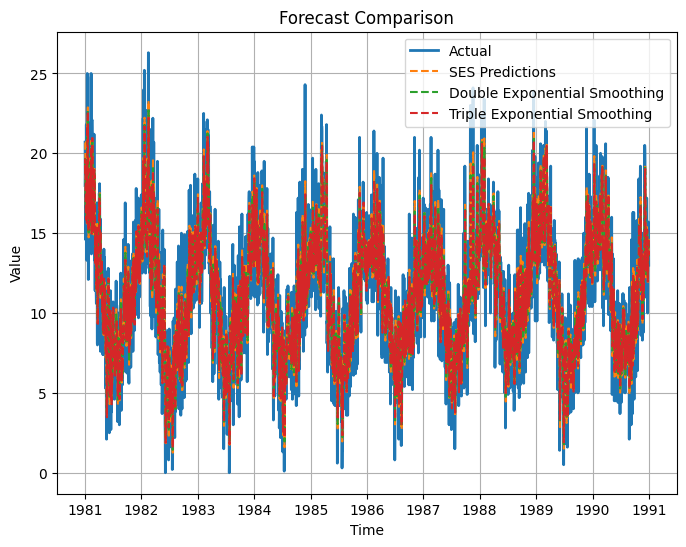

<Figure size 1000x500 with 0 Axes>

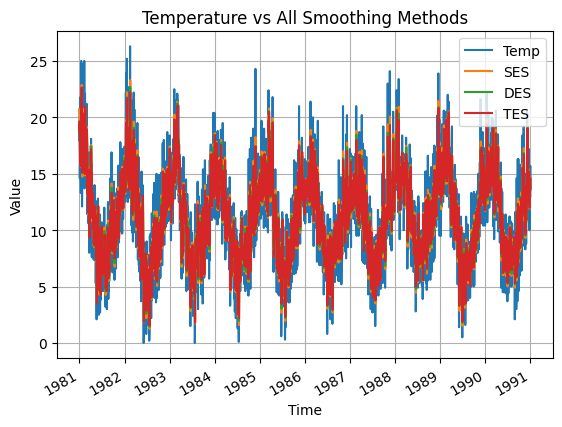

In [21]:
# Extract fitted values for plotting
pred_ses = data['SES']
pred_double = data['DES']
pred_triple = data['TES']

# Plotting the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.plot(data['Temp'], label='Actual', linewidth=2)
plt.plot(pred_ses, label='SES Predictions', linestyle='--')
plt.plot(pred_double, label='Double Exponential Smoothing', linestyle='--')
plt.plot(pred_triple, label='Triple Exponential Smoothing', linestyle='--')
plt.legend()
plt.title("Forecast Comparison")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Plot all series together
plt.figure(figsize=(10, 5))
data[['Temp', 'SES', 'DES', 'TES']].plot()
plt.title("Temperature vs All Smoothing Methods")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


Older data points are weighted exponentially less.

In [ ]:
data.shape

(3650, 7)

<Figure size 2000x2000 with 0 Axes>

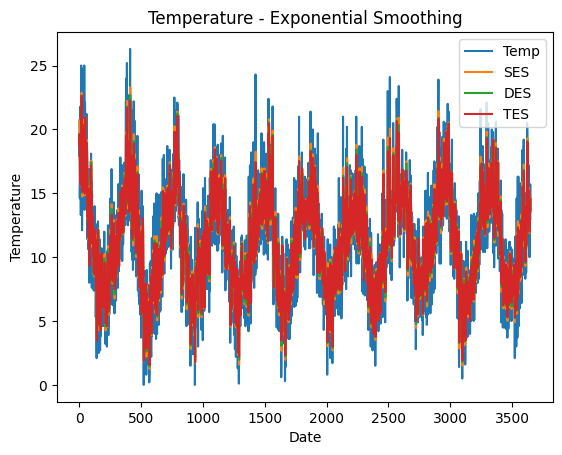

In [ ]:
# Plot
plt.figure(figsize=(20,20))
data[['Temp', 'SES', 'DES', 'TES']].plot()
plt.title("Temperature - Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

## **Model Building**

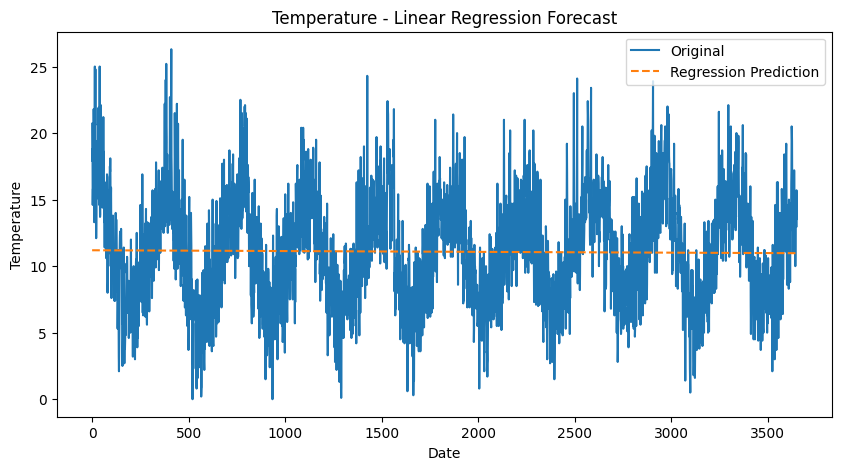

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Create TimeIndex feature
data['TimeIndex'] = np.arange(len(data))
X = data[['TimeIndex']]
y = data['Temp']

# Split data (no shuffling!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression().fit(X_train, y_train)

# Predict and store
data['Regression_Pred'] = model.predict(X)

# Plot predictions
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['Regression_Pred'], label='Regression Prediction', linestyle='dashed')
plt.title("Temperature - Linear Regression Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Train set metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

In [ ]:

# Test set metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


In [ ]:
# Print results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.2f}")

print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.2f}")


Train Set Evaluation:
MAE: 3.25
MSE: 16.48
RMSE: 4.06
R²: 0.00

Test Set Evaluation:
MAE: 3.40
MSE: 17.05
RMSE: 4.13
R²: -0.01


In [ ]:
data.shape

(3650, 10)

## **SUMMARY:**

The metrics show that the model is underfitting. With an MAE of ~3.3 and an R² near zero or negative, it’s clear the model isn't capturing meaningful patterns in the data. It performs no better than simply predicting the average temperature, likely because it's too simple and only uses time as a feature.










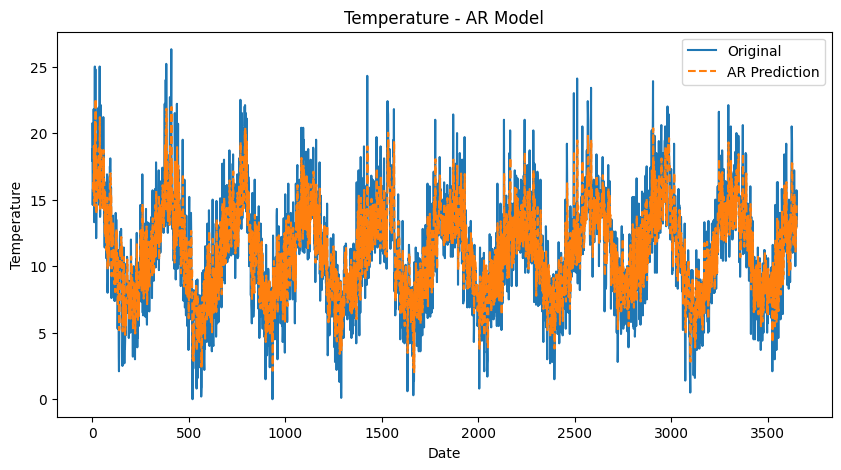

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model on Temp column
model_ar = AutoReg(data['Temp'], lags=5).fit()

# Predict
data['AR_Pred'] = model_ar.predict(start=5, end=len(data)-1)

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['AR_Pred'], label='AR Prediction', linestyle='dashed')
plt.title('Temperature - AR Model')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [ ]:
data.shape

(3650, 11)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Fit AR model with lags
model_ar = AutoReg(data['Temp'], lags=5).fit()

# Predict from lag point to end
pred_start = model_ar.model._hold_back  # Automatically picks the correct start
pred_end = len(data) - 1
data['AR_Pred'] = model_ar.predict(start=pred_start, end=pred_end, dynamic=False)

# Drop NaNs for evaluation
y_true = data['Temp'].iloc[pred_start:]
y_pred = data['AR_Pred'].iloc[pred_start:]

# Evaluation
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print
print("AutoReg Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


AutoReg Model Evaluation:
MAE: 1.93
MSE: 6.09
RMSE: 2.47
R²: 0.63


### SUMMARY 2:

The AutoReg model performs well with low MAE (1.93), MSE (6.09), and RMSE (2.47), indicating relatively accurate predictions. It explains 63% of the variance (R²), making it a strong model for this time-series data.

In [ ]:
data.isnull().sum()

,0
Temp,0
MA_7,6
MA_30,29
MA_90,89
SES,0
DES,0
TES,0
TimeIndex,0
Regression_Pred,0
AR_Pred,3650


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA model on Temp data (AR=0, I=0, MA=2)
model_ma = ARIMA(data['Temp'], order=(0, 0, 2)).fit()

# Get predictions
data['MA_Pred'] = model_ma.fittedvalues

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['MA_Pred'], label='MA Prediction', linestyle='dashed')
plt.title('Temperature - MA Model')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MA Model Predictions (in-sample)
y_true = data['Temp']
y_pred = data['MA_Pred']

# Ensure no NaN values
mask = ~y_pred.isna()

# Apply mask for valid data
mae = mean_absolute_error(y_true[mask], y_pred[mask])
mse = mean_squared_error(y_true[mask], y_pred[mask])
rmse = np.sqrt(mse)
r2 = r2_score(y_true[mask], y_pred[mask])

# Print Evaluation metrics
print("MA Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MA Model Evaluation:
MAE: 2.23
MSE: 7.99
RMSE: 2.83
R²: 0.52


### **SUMMARY 3:**


The MA model has slightly higher error metrics (MAE: 2.23, MSE: 7.99, RMSE: 2.83) and explains 52% of the variance (R²), showing it is less accurate and less effective than AutoReg, but still a decent model.

# **RESULT:**


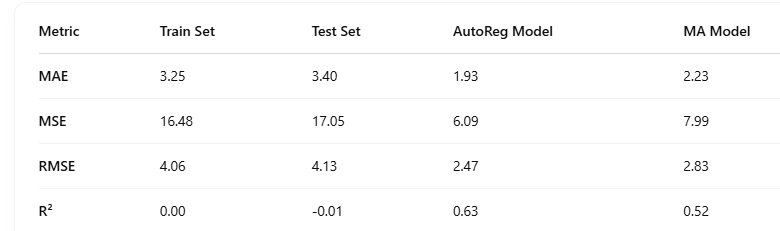

The **AutoReg** model outperforms all others with the **lowest error metrics** and **highest R² (0.63)**, indicating it effectively captures the patterns in the data. The **MA** model follows, with decent performance and a **R² of 0.52**, though its errors are higher than AutoReg. The **Linear Regression** model struggles significantly, with **high error metrics** and a **R² of 0.00**, showing poor predictive power. The **AR model** also doesn't perform well, with a **negative R²** and higher errors compared to AutoReg. Overall, AutoReg is the most reliable model for this dataset.